# Hopfield_Tankの再現実験

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 都市の数を10で、ランダムに領域$[0, 1]^{2}$に配置

In [2]:
N = 10

In [3]:
x = np.random.rand(N)
y = np.random.rand(N)

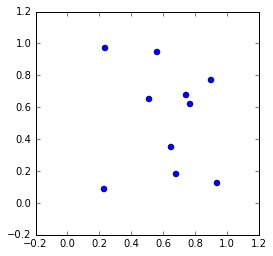

In [4]:
plt.plot(x, y, "o")
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.axes().set_aspect('equal')

In [5]:
points = np.c_[x, y]

In [6]:
np.save("points1", points)

In [7]:
import TSP

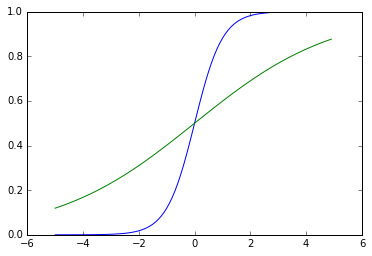

In [8]:
x = np.arange(-5, 5, 0.1)
plt.plot(x, TSP.sigmoid(x, u_0=1))
plt.plot(x, TSP.sigmoid(x, u_0=5))

In [9]:
dist_matrix = TSP.calc_dist_matrix(points)

In [10]:
dist_matrix

array([[ 0.        ,  0.38628425,  0.26273831,  0.19960044,  0.29771831,
         0.76186974,  0.63958562,  0.06409764,  0.52536629,  0.44822119],
       [ 0.38628425,  0.        ,  0.29541086,  0.382142  ,  0.6015924 ,
         0.9215621 ,  0.325709  ,  0.32283089,  0.90479898,  0.7738839 ],
       [ 0.26273831,  0.29541086,  0.        ,  0.40857658,  0.33388263,
         0.63443904,  0.41968398,  0.23433943,  0.68256232,  0.50394325],
       [ 0.19960044,  0.382142  ,  0.40857658,  0.        ,  0.49240883,
         0.96098786,  0.69466115,  0.18355671,  0.64966184,  0.62938816],
       [ 0.29771831,  0.6015924 ,  0.33388263,  0.49240883,  0.        ,
         0.49530768,  0.74593633,  0.34250961,  0.36926815,  0.17260234],
       [ 0.76186974,  0.9215621 ,  0.63443904,  0.96098786,  0.49530768,
         0.        ,  0.88662814,  0.78523809,  0.71144148,  0.46526438],
       [ 0.63958562,  0.325709  ,  0.41968398,  0.69466115,  0.74593633,
         0.88662814,  0.        ,  0.58570108

In [11]:
TSP.sigmoid(1)

1.0

In [12]:
TSP.sigmoid(0)

0.5

In [13]:
import importlib

In [25]:
importlib.reload(TSP)

<module 'TSP' from '/home/yuki/workspace/reserch/hopfield/jupyter_notebook/TSP.py'>

In [26]:
state_matrix = TSP.generate_initial_state(N, u_0=0.02)

In [30]:
state_matrix.shape

(10, 10)

In [28]:
TSP.logit(0.01)

-0.091902397002691802

In [29]:
TSP.sigmoid(TSP.logit(0.01))

0.0001020199959191892

In [31]:
def func1(u, u_0):
    return 1 / (1 + np.exp(-(u / u_0)))

In [32]:
func1(1, 0.1)

0.99995460213129761

In [33]:
def func2(u, u_0):
    return (1 + np.tanh(u / u_0)) / 2

In [34]:
func2(1, 0.1)

0.99999999793884631

In [35]:
importlib.reload(TSP)

<module 'TSP' from '/home/yuki/workspace/reserch/hopfield/jupyter_notebook/TSP.py'>

In [36]:
TSP.sigmoid(0.1)

0.99330714907571527

In [37]:
TSP.logit(TSP.sigmoid(0.1))

0.10000000000000038

In [38]:
TSP.sigmoid(TSP.logit(0.8))

0.80000000000000004

In [39]:
np.sum(state_matrix)

-8.5399069410262829

In [40]:
state_matrix.shape

(10, 10)

In [41]:
type(state_matrix)

numpy.ndarray

In [46]:
TSP.sigmoid(state_matrix[0][0])

0.0002707175964143989

In [47]:
state_matrix = TSP.generate_initial_state(N)

In [48]:
state_matrix

array([[-0.06112321, -0.15874452, -0.05577582, -0.15762164, -0.18373308,
        -0.11520409, -0.1345803 , -0.15898537, -0.14834793, -0.12928827],
       [ 0.00357002, -0.11085006,  0.00303191, -0.12871573, -0.17317935,
        -0.03478498, -0.03055676, -0.13295014, -0.07200668, -0.17966891],
       [-0.02494545, -0.16674658, -0.17158636, -0.07805721, -0.1873664 ,
         0.0046186 , -0.07420462, -0.00242984, -0.13969966, -0.01087778],
       [-0.08192396,  0.00674226, -0.17751052, -0.17064341, -0.19115223,
        -0.12186783, -0.18224992, -0.03529652, -0.16305165, -0.06841853],
       [-0.10531458, -0.04297906, -0.15419468, -0.12062906, -0.14396175,
        -0.02700935, -0.04687439, -0.09943191, -0.0932056 , -0.12032836],
       [-0.18968669,  0.00158182, -0.07336608, -0.01570945, -0.08521932,
        -0.00257147, -0.1310027 , -0.09028446, -0.02818649, -0.08257021],
       [-0.17520245, -0.0233211 , -0.17634996, -0.13825351, -0.12880111,
        -0.02215549, -0.08060626, -0.1287597 

In [52]:
TSP.sigmoid(state_matrix[0][5])

0.0031405727274111082

In [53]:
outputs = state_matrix.copy()

In [55]:
outputs.shape

(10, 10)

In [61]:
outputs = state_matrix.copy()
for i in range(N):
    for j in range(N):
        outputs[i][j] = TSP.sigmoid(state_matrix[i][j])

In [63]:
outputs.shape

(10, 10)

In [64]:
state_matrix

array([[-0.06112321, -0.15874452, -0.05577582, -0.15762164, -0.18373308,
        -0.11520409, -0.1345803 , -0.15898537, -0.14834793, -0.12928827],
       [ 0.00357002, -0.11085006,  0.00303191, -0.12871573, -0.17317935,
        -0.03478498, -0.03055676, -0.13295014, -0.07200668, -0.17966891],
       [-0.02494545, -0.16674658, -0.17158636, -0.07805721, -0.1873664 ,
         0.0046186 , -0.07420462, -0.00242984, -0.13969966, -0.01087778],
       [-0.08192396,  0.00674226, -0.17751052, -0.17064341, -0.19115223,
        -0.12186783, -0.18224992, -0.03529652, -0.16305165, -0.06841853],
       [-0.10531458, -0.04297906, -0.15419468, -0.12062906, -0.14396175,
        -0.02700935, -0.04687439, -0.09943191, -0.0932056 , -0.12032836],
       [-0.18968669,  0.00158182, -0.07336608, -0.01570945, -0.08521932,
        -0.00257147, -0.1310027 , -0.09028446, -0.02818649, -0.08257021],
       [-0.17520245, -0.0233211 , -0.17634996, -0.13825351, -0.12880111,
        -0.02215549, -0.08060626, -0.1287597 

In [65]:
np.sum(outputs)

9.4459883345427134

In [69]:
importlib.reload(TSP)

<module 'TSP' from '/home/yuki/workspace/reserch/hopfield/jupyter_notebook/TSP.py'>

In [70]:
tspnet = TSP.TSPNetwork(size=N, A=500, B=500, C=200, D=500, n=15, u_0=0.02, dists=dist_matrix)

NameError: name 'self' is not defined

In [71]:
importlib.reload(TSP)

<module 'TSP' from '/home/yuki/workspace/reserch/hopfield/jupyter_notebook/TSP.py'>

In [72]:
tspnet = TSP.TSPNetwork(size=N, A=500, B=500, C=200, D=500, n=15, u_0=0.02, dists=dist_matrix)

TypeError: __generate_initial_states() takes 1 positional argument but 2 were given

In [78]:
importlib.reload(TSP)

<module 'TSP' from '/home/yuki/workspace/reserch/hopfield/jupyter_notebook/TSP.py'>

In [79]:
tspnet = TSP.TSPNetwork(size=N, A=500, B=500, C=200, D=500, n=15, u_0=0.02, dists=dist_matrix)

In [81]:
initial_outputs = tspnet.get_outputs()

In [82]:
np.sum(initial_outputs)

11.449227373611031

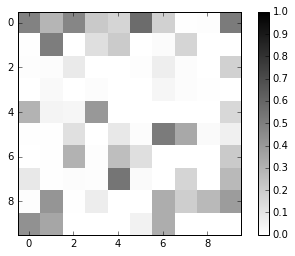

In [84]:
plt.imshow(initial_outputs, cmap=plt.cm.gray_r, vmin=0, vmax=1, interpolation="nearest")
plt.colorbar()

In [85]:
np.random.permutation(range(10))

array([4, 2, 9, 3, 1, 7, 0, 8, 6, 5])

In [86]:
importlib.reload(TSP)

<module 'TSP' (namespace)>

In [87]:
tspnet = TSP.TSPNetwork(size=N, A=500, B=500, C=200, D=500, n=15, u_0=0.02, dists=dist_matrix)

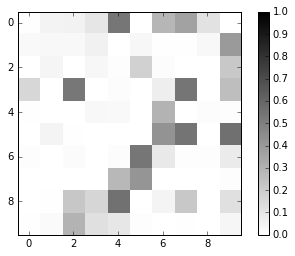

In [89]:
plt.imshow(tspnet.get_outputs(), cmap=plt.cm.gray_r, vmin=0, vmax=1, interpolation="nearest")
plt.colorbar()

In [90]:
tspnet.update()

In [91]:
import sys

In [92]:
sys.path.append("./TSP/")

In [93]:
import TSP

In [94]:
tspnet = TSP.TSPNetwork(size=N, A=500, B=500, C=200, D=500, n=15, u_0=0.02, dists=dist_matrix)

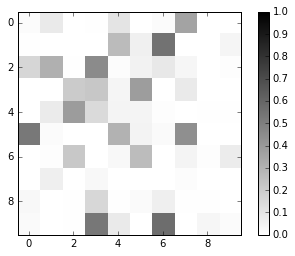

In [95]:
plt.imshow(tspnet.get_outputs(), cmap=plt.cm.gray_r, vmin=0, vmax=1, interpolation="nearest")
plt.colorbar()

In [96]:
tspnet.update()

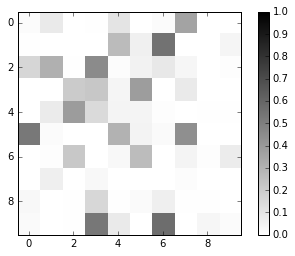

In [97]:
plt.imshow(tspnet.get_outputs(), cmap=plt.cm.gray_r, vmin=0, vmax=1, interpolation="nearest")
plt.colorbar()